In [17]:
import os

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [35]:
orig_df = pd.read_excel("Assignment3_cluster2.xlsx",sheet_name='2556')
orig_df.head()

,ministry,personnel,operation,invest,subsidy,others
0,a,16350.0,69122.0,62697.0,159814.0,11881.0
1,b,3385.8,1998.6,1395.3,6352.3,12114.8
2,c,81687.4,21635.8,5444.6,3308.3,68415.4
3,d,10635.1,6196.3,1664.5,592.9,161619.1
4,e,2698.5,2287.0,565.2,973.9,1351.4


<AxesSubplot:>

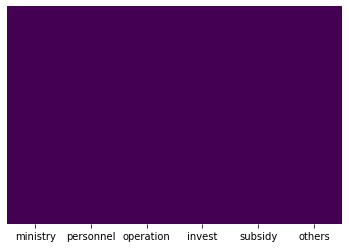

In [36]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [37]:
orig_df.describe()

,personnel,operation,invest,subsidy,others
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,26242.050000,10137.545455,12222.977273,28070.640909,14073.704545
std,55289.304864,15842.653129,21833.754415,63832.249392,36220.923022
min,345.400000,439.700000,172.700000,23.200000,156.900000
25%,1986.350000,1720.875000,551.400000,864.075000,1062.900000
50%,5548.300000,3425.600000,1601.700000,2773.750000,1772.950000
75%,16203.775000,12430.750000,11924.725000,7375.150000,5939.975000
max,249592.100000,69122.000000,83917.600000,236013.300000,161619.100000


In [38]:
orig_df.columns

Index(['ministry', 'personnel', 'operation', 'invest', 'subsidy', 'others'], dtype='object')

In [39]:
df = orig_df[['personnel','operation','invest', 'subsidy','others']]
df

,personnel,operation,invest,subsidy,others
0,16350.0,69122.0,62697.0,159814.0,11881.0
1,3385.8,1998.6,1395.3,6352.3,12114.8
2,81687.4,21635.8,5444.6,3308.3,68415.4
3,10635.1,6196.3,1664.5,592.9,161619.1
4,2698.5,2287.0,565.2,973.9,1351.4
5,1208.4,1131.6,4851.0,2951.5,1783.5
6,2448.2,3861.3,591.2,3350.0,198.1
7,23278.8,13624.8,32285.6,2596.0,1097.7
8,8634.2,2252.0,83917.6,39.7,1105.2
9,9228.0,6101.6,12831.4,912.0,1584.8


In [40]:
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.064212,1.000000,0.746604,0.677108,0.072612
1,0.012198,0.022697,0.014599,0.026819,0.074060
2,0.326351,0.308611,0.062952,0.013920,0.422752
3,0.041283,0.083815,0.017814,0.002414,1.000000
4,0.009441,0.026896,0.004687,0.004029,0.007398


In [41]:
df_normalized.describe()

,0,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.103900,0.141199,0.143893,0.118850,0.086192
std,0.221826,0.230666,0.260717,0.270487,0.224331
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006584,0.018654,0.004522,0.003563,0.005611
50%,0.020874,0.043474,0.017064,0.011655,0.010009
75%,0.063625,0.174587,0.140331,0.031154,0.035817
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

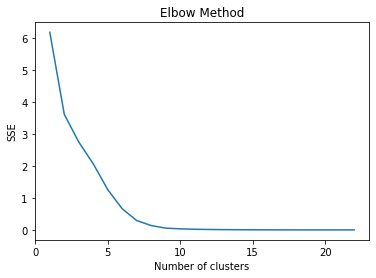

In [42]:
max_k = 23
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [43]:
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [44]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

,personnel,operation,invest,subsidy,others,cluster_id
0,16350.0,69122.0,62697.0,159814.0,11881.0,2
1,3385.8,1998.6,1395.3,6352.3,12114.8,0
2,81687.4,21635.8,5444.6,3308.3,68415.4,0
3,10635.1,6196.3,1664.5,592.9,161619.1,5
4,2698.5,2287.0,565.2,973.9,1351.4,0
5,1208.4,1131.6,4851.0,2951.5,1783.5,0
6,2448.2,3861.3,591.2,3350.0,198.1,0
7,23278.8,13624.8,32285.6,2596.0,1097.7,0
8,8634.2,2252.0,83917.6,39.7,1105.2,4
9,9228.0,6101.6,12831.4,912.0,1584.8,0


In [45]:
df.cluster_id.value_counts()

0    17
5     1
4     1
3     1
2     1
1     1
Name: cluster_id, dtype: int64

In [46]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.19596487323279788


In [47]:
df[df.cluster_id==0].mean()

personnel     16255.800000
operation      5749.435294
invest         4560.582353
subsidy        4583.635294
others         5948.482353
cluster_id        0.000000
dtype: float64

In [48]:
df.to_csv('cluster_res_kmean56.csv')